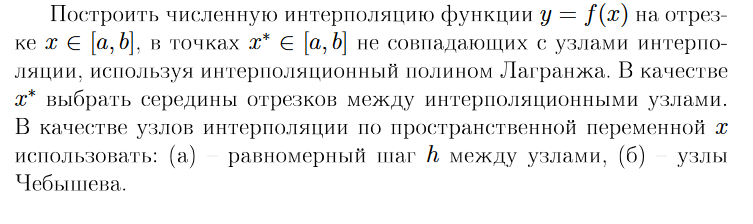

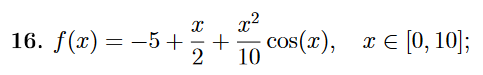

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Просто нужные импорты
def f(x):
    return -5 + x / 2 + (x**2 / 10) * np.cos(x)
# Сама наша функция

a, b = 0, 10
# Наш отрезок

# Пункт А


h = 1.0


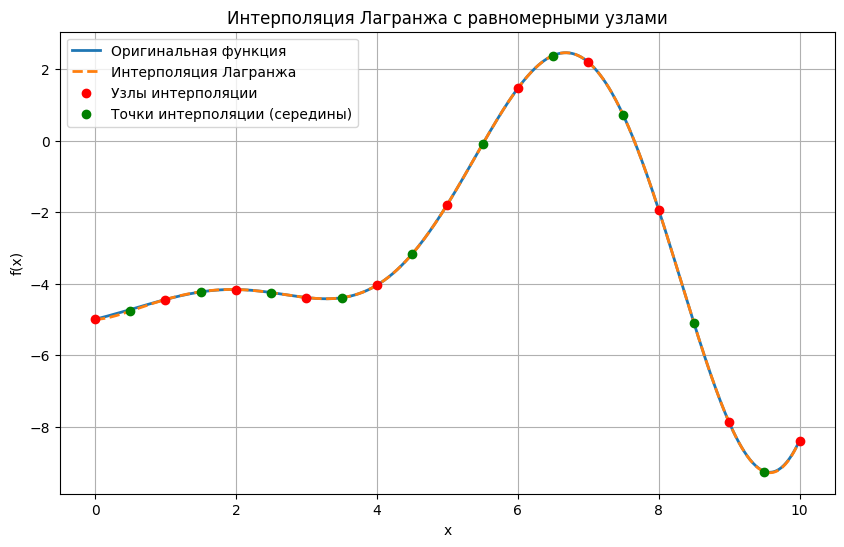

In [24]:
n = 11 # Кол-во узлов + 1 
print(f"h = {abs(a-b)/(n-1)}")

knots = np.linspace(a, b, n) # Наши узлы
values = f(knots) # f(x) для наших узлов

midpoints = (knots[:-1] + knots[1:]) / 2 # Средние точки по которым будем интерполировать

def lagrange(x, x_nodes, y_nodes):
    """
    Для каждой отдельной точки считается сумма произведений. Сумма состоит из n слагаемых,
    где n - кол-во узлов. Каждое слагаемое - это произведение полинома Лагранжа на значение
    функции в узле. Каждый полином Лагранжа - это произведение дробей, в которых в числителе
    стоит (x - x_j), а в знаменателе - (x_i - x_j). Где х - наша точка, а i и j это индексы узлов.
    При этом при i == j, полином == 1 по опр. 
    \n
    \n
    Общая идея интерполяционного полинома Лагранжа - это брать известные нам точки и на основе 
    известной о них информации строить те, которые мы не знаем. Это достигается тем, что мы
    учитываем все известные нам точки (поэтому у нас сумма и в каждом слагаемом присутствует y),
    а так же то, что ближние точки к той, которую мы пытаемся интерполировать должны вностить
    больший вклад, чем остальные (это достигается тем, что полином лагранжа тем меньше, чем дальше
    от нее находится точка, которую мы пытаемся интерполировать).
    """
    n = len(x_nodes)
    result = 0
    for i in range(n):
        L = y_nodes[i]
        for j in range(n):
            if j != i:
                L *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        result += L
    return result

x_dense = np.linspace(a, b, 500)  # Плотная сетка для графика
y_interpolated = [lagrange(x, knots, values) for x in x_dense]
y_actual = f(x_dense)  # Истинные значения функции

errors = np.abs(y_actual - y_interpolated)
max_error_a = np.max(errors)
max_error_index_a = np.argmax(errors)
max_error_x_a = x_dense[max_error_index_a]

plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_actual, label="Оригинальная функция", linewidth=2)
plt.plot(x_dense, y_interpolated, '--', label="Интерполяция Лагранжа", linewidth=2)
plt.scatter(knots, values, color='red', label="Узлы интерполяции", zorder=5)
plt.scatter(midpoints, [lagrange(x, knots, values) for x in midpoints], 
            color='green', label="Точки интерполяции (середины)", zorder=5)
plt.title("Интерполяция Лагранжа с равномерными узлами")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

# Пункт Б

In [ ]:
def chebyshev(a, b, n):
    """
    Узлы Чебушева расположены ближе к концам интервала, это позволяет уменьшить ошибку приближения.
    Ищутся они по известной формуле 
    """
    return np.array([
        0.5 * (a + b) + 0.5 * (b - a) * np.cos(np.pi * (2 * k + 1) / (2 * n))
        for k in range(n)
    ])

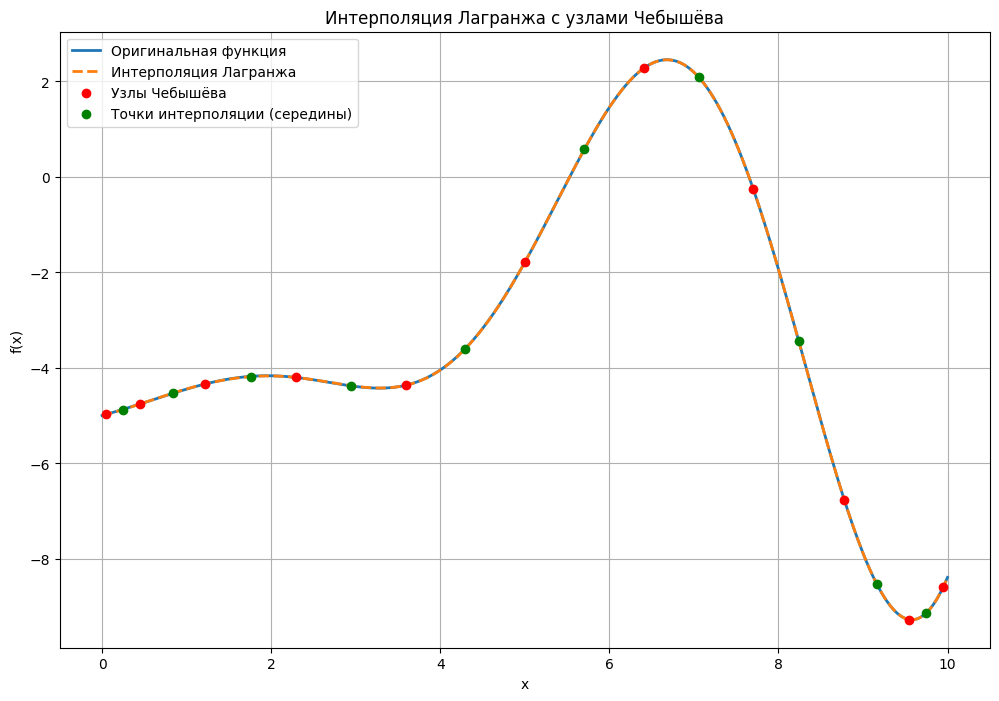

Максимальная ошибка: 0.0055 в точке x = 0.00


In [ ]:
chebyshev_nodes = chebyshev(a, b, n)
chebyshev_values = f(chebyshev_nodes)

midpoints = [(chebyshev_nodes[i] + chebyshev_nodes[i + 1]) / 2 for i in range(n - 1)]

x_dense = np.linspace(a, b, 500)
y_actual = f(x_dense)
y_interpolated = [lagrange(x, chebyshev_nodes, chebyshev_values) for x in x_dense]

errors = np.abs(y_actual - y_interpolated)
max_error = np.max(errors)
max_error_index = np.argmax(errors)
max_error_x = x_dense[max_error_index]

plt.figure(figsize=(12, 8))
plt.plot(x_dense, y_actual, label="Оригинальная функция", linewidth=2)
plt.plot(x_dense, y_interpolated, '--', label="Интерполяция Лагранжа", linewidth=2)
plt.scatter(chebyshev_nodes, chebyshev_values, color='red', label="Узлы Чебышёва", zorder=5)
plt.scatter(midpoints, [lagrange(x, chebyshev_nodes, chebyshev_values) for x in midpoints], 
            color='green', label="Точки интерполяции (середины)", zorder=5)
plt.title("Интерполяция Лагранжа с узлами Чебышёва")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()



In [27]:
# Сравнение ошибок:
print(f"Максимальная в пункте а: {max_error_a:.4f} в точке x = {max_error_x_a:.2f}")
print(f"Максимальная через узлы Чебышева: {max_error:.4f} в точке x = {max_error_x:.2f}")

Максимальная в пункте а: 0.0548 в точке x = 0.28
Максимальная через узлы Чебышева: 0.0055 в точке x = 0.00


## График в десмосе, чтобы убедиться что математика работает
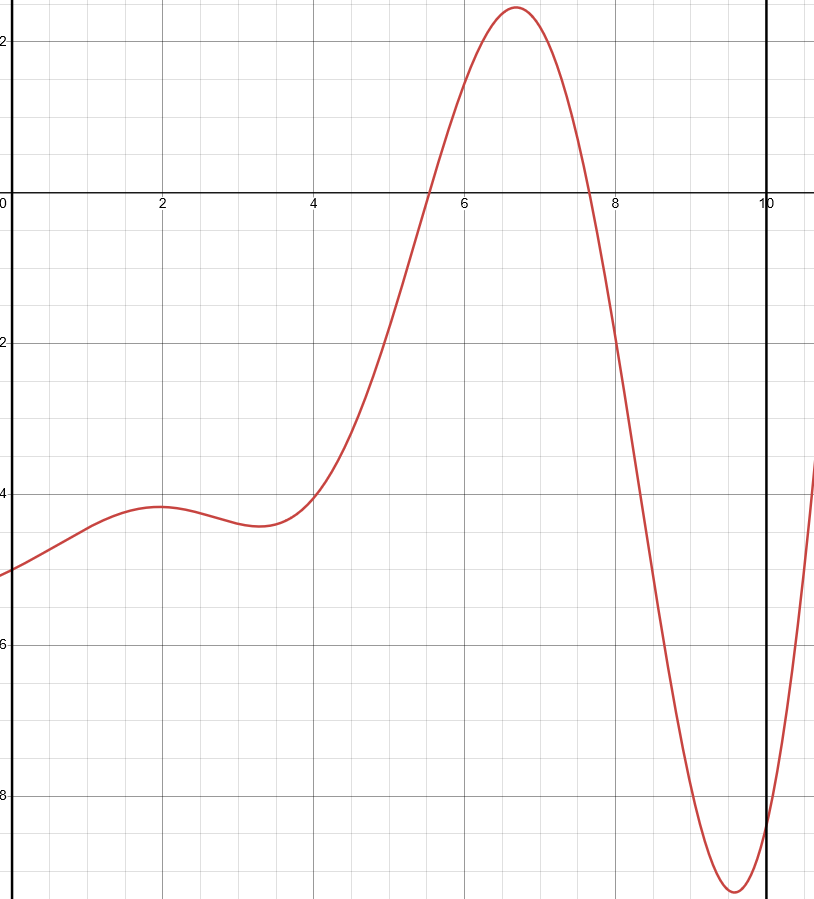